In [1]:
# Machine learning to analyze birds affected by Mobile towers

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#importing ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import  seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [4]:
#1.Collecting the data
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/birds/Birds.csv')

data.head( )

Mounted at /content/drive


,ID,Tower company,Structure Type,Radio frequency,Birds affected,Death Rate(in %),Location,Total Towers(Present),Total Towers(before 5 years)
0,20400,AT&T,LTower,531,Sparrow,60,Alabama,866,243
1,20401,AT&T,MTower,702,Bulbul,34,Alaska,848,59
2,20402,Mint Mobile,GTower,513,Kite,73,Arizona,305,247
3,20403,Lyca Mobile,LTower,792,Spotted Dove,40,Arkansas,884,222
4,20404,Verizon,GTower,643,Bulbul,75,California,345,112


In [5]:
#DataWranglinig - preprocesssing

In [6]:

data.head()

,ID,Tower company,Structure Type,Radio frequency,Birds affected,Death Rate(in %),Location,Total Towers(Present),Total Towers(before 5 years)
0,20400,AT&T,LTower,531,Sparrow,60,Alabama,866,243
1,20401,AT&T,MTower,702,Bulbul,34,Alaska,848,59
2,20402,Mint Mobile,GTower,513,Kite,73,Arizona,305,247
3,20403,Lyca Mobile,LTower,792,Spotted Dove,40,Arkansas,884,222
4,20404,Verizon,GTower,643,Bulbul,75,California,345,112


In [7]:
data.drop('ID',axis=1,inplace=True)
data.head()

,Tower company,Structure Type,Radio frequency,Birds affected,Death Rate(in %),Location,Total Towers(Present),Total Towers(before 5 years)
0,AT&T,LTower,531,Sparrow,60,Alabama,866,243
1,AT&T,MTower,702,Bulbul,34,Alaska,848,59
2,Mint Mobile,GTower,513,Kite,73,Arizona,305,247
3,Lyca Mobile,LTower,792,Spotted Dove,40,Arkansas,884,222
4,Verizon,GTower,643,Bulbul,75,California,345,112


<Axes: xlabel='Birds affected', ylabel='count'>

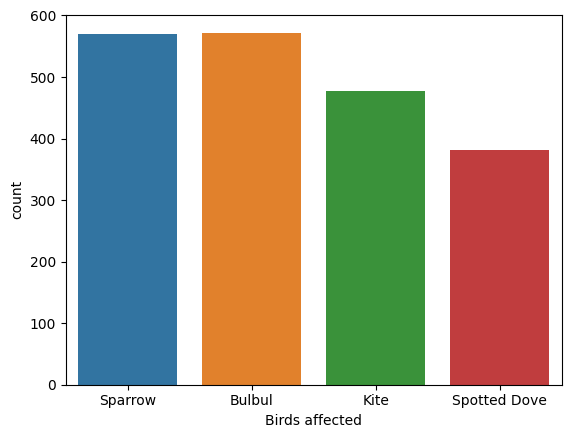

In [8]:
sns.countplot(data=data, x = 'Birds affected', label='Count')

<Axes: xlabel='Tower company', ylabel='count'>

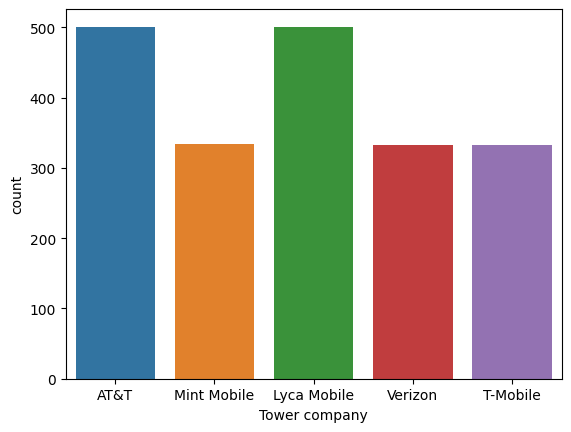

In [9]:
sns.countplot(data=data, x = 'Tower company', label='Count')

<Axes: xlabel='Total Towers(Present)', ylabel='count'>

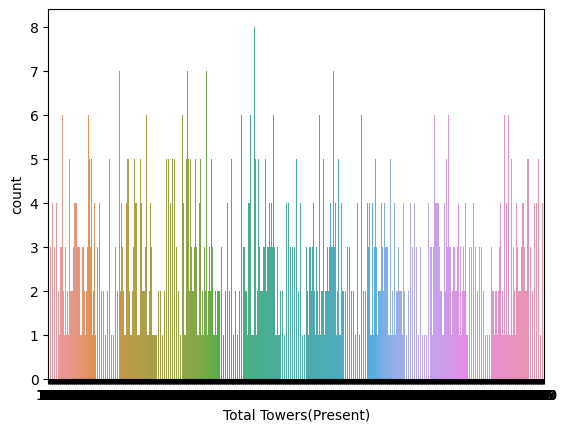

In [10]:
sns.countplot(data=data, x = 'Total Towers(Present)', label='Count')


<Axes: xlabel='Total Towers(before 5 years)', ylabel='count'>

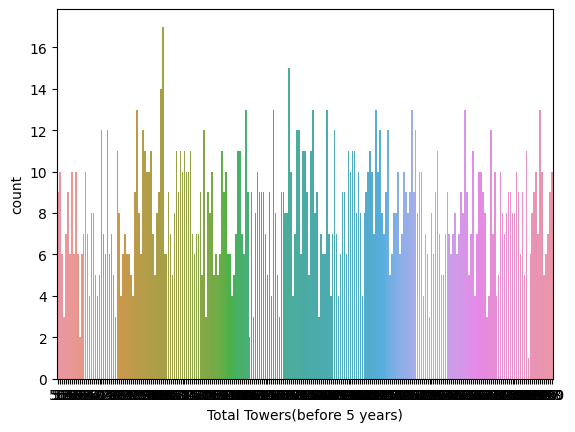

In [11]:
sns.countplot(data=data, x = 'Total Towers(before 5 years)', label='Count')



<Axes: xlabel='Death Rate(in %)', ylabel='count'>

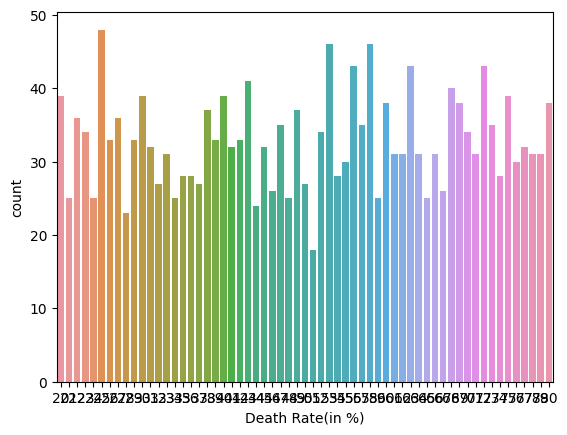

In [12]:
sns.countplot(data=data, x = 'Death Rate(in %)', label='Count')



In [13]:
#3.Analyze the data

In [14]:
train,test=train_test_split(data,test_size=0.3)
print(train.shape)
print(test.shape)

(1400, 8)
(601, 8)


In [15]:
data.shape

(2001, 8)

In [16]:
#relevant columns

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Tower company                 2001 non-null   object
 1   Structure Type                2001 non-null   object
 2   Radio frequency               2001 non-null   int64 
 3   Birds affected                2001 non-null   object
 4   Death Rate(in %)              2001 non-null   int64 
 5   Location                      2001 non-null   object
 6   Total Towers(Present)         2001 non-null   int64 
 7   Total Towers(before 5 years)  2001 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 125.2+ KB


In [18]:
data.describe()

,Radio frequency,Death Rate(in %),Total Towers(Present),Total Towers(before 5 years)
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,598.704148,50.306347,495.769615,176.248376
std,171.015568,17.720796,230.341966,71.175725
min,300.000000,20.000000,100.000000,50.000000
25%,454.000000,35.000000,301.000000,114.000000
50%,596.000000,51.000000,488.000000,176.000000
75%,743.000000,66.000000,693.000000,235.000000
max,900.000000,80.000000,900.000000,300.000000


In [19]:
data.corr()

<ipython-input-19-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Radio frequency,Death Rate(in %),Total Towers(Present),Total Towers(before 5 years)
Radio frequency,1.000000,-0.028320,0.026972,0.037735
Death Rate(in %),-0.028320,1.000000,-0.020940,-0.017886
Total Towers(Present),0.026972,-0.020940,1.000000,0.005979
Total Towers(before 5 years),0.037735,-0.017886,0.005979,1.000000


In [20]:
data.head()

,Tower company,Structure Type,Radio frequency,Birds affected,Death Rate(in %),Location,Total Towers(Present),Total Towers(before 5 years)
0,AT&T,LTower,531,Sparrow,60,Alabama,866,243
1,AT&T,MTower,702,Bulbul,34,Alaska,848,59
2,Mint Mobile,GTower,513,Kite,73,Arizona,305,247
3,Lyca Mobile,LTower,792,Spotted Dove,40,Arkansas,884,222
4,Verizon,GTower,643,Bulbul,75,California,345,112


In [21]:
#prediction variables

prediction_var=['Radio frequency ','Total Towers(Present)','Total Towers(before 5 years)']

In [22]:
prediction_var

['Radio frequency ', 'Total Towers(Present)', 'Total Towers(before 5 years)']

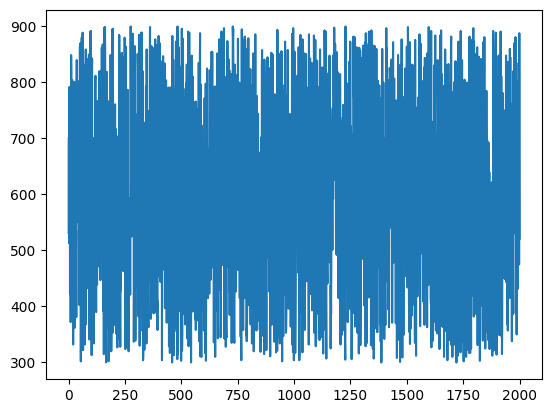

In [23]:
plt.plot(data['Radio frequency '])
plt.show()

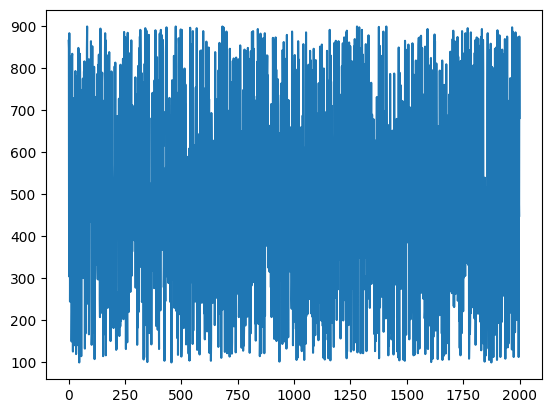

In [24]:
plt.plot(data['Total Towers(Present)'])
plt.show()

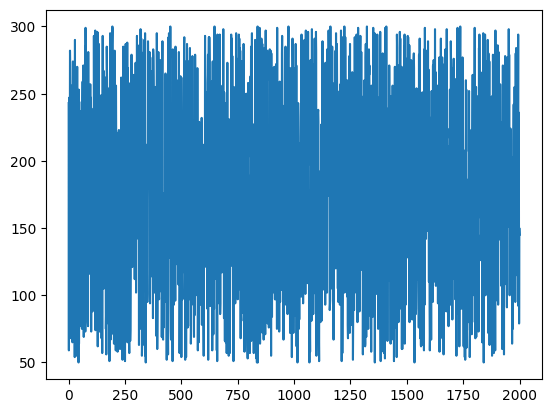

In [25]:
plt.plot(data['Total Towers(before 5 years)'])
plt.show()

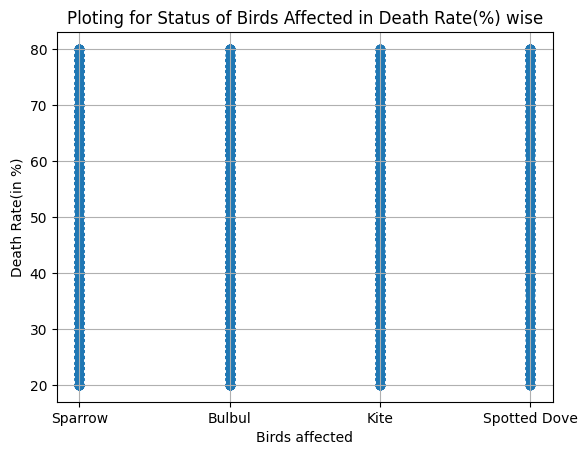

In [26]:
plt.scatter(data['Birds affected'],data['Death Rate(in %)'])
plt.xlabel("Birds affected")
plt.ylabel("Death Rate(in %)")
plt.title("Ploting for Status of Birds Affected in Death Rate(%) wise")
plt.grid()

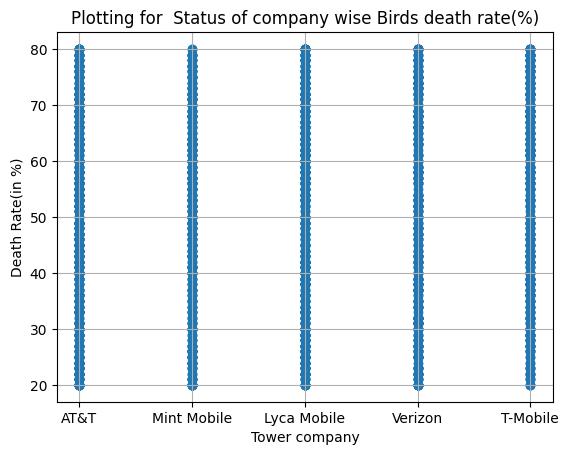

In [27]:
plt.scatter(data['Tower company'],data['Death Rate(in %)'])
plt.xlabel("Tower company")
plt.ylabel("Death Rate(in %)")
plt.title("Plotting for  Status of company wise Birds death rate(%)")
plt.grid()

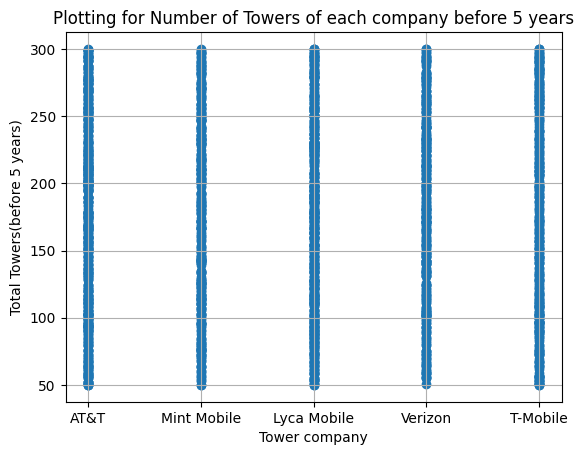

In [28]:
plt.scatter(data['Tower company'],data['Total Towers(before 5 years)'])
plt.xlabel("Tower company")
plt.ylabel("Total Towers(before 5 years)")
plt.title("Plotting for Number of Towers of each company before 5 years")
plt.grid()



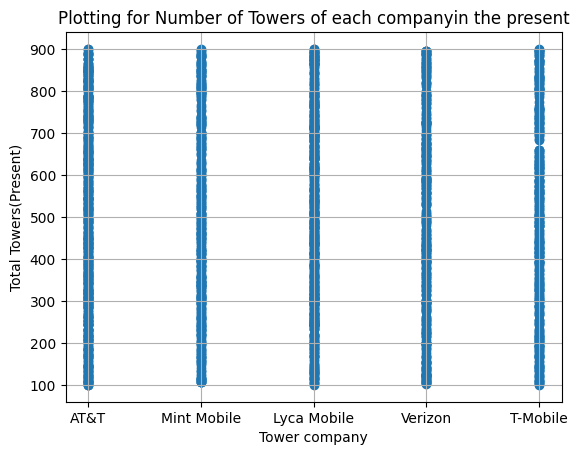

In [29]:
plt.scatter(data['Tower company'],data['Total Towers(Present)'])
plt.xlabel("Tower company")
plt.ylabel("Total Towers(Present)")
plt.title("Plotting for Number of Towers of each companyin the present")
plt.grid()

<ipython-input-30-671218809cba>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, linewidth=.5, vmin=-0.03, vmax=0.04)


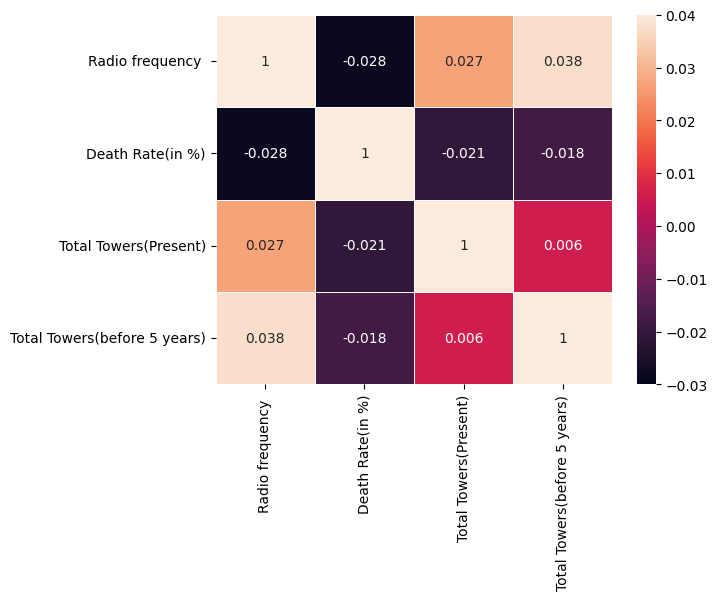

In [30]:
sns.heatmap(data.corr(), annot=True, linewidth=.5, vmin=-0.03, vmax=0.04)
plt.show()

In [31]:
#---create ensemble moon split
birds_data=data.size
X, y = make_moons(n_samples=birds_data, noise=0.30)

In [32]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

log = LogisticRegression()
bnb = BernoulliNB()
knn=KNeighborsClassifier(n_neighbors=8)

In [33]:
#----Apply ensemble Voting 
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [34]:
voting = VotingClassifier(
    estimators=[('logistics_regression', log), ('KNeighborsClassifier', knn), ('BernoulliNB', bnb)],
    voting='hard')
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('logistics_regression', LogisticRegression()),
                             ('KNeighborsClassifier',
                              KNeighborsClassifier(n_neighbors=8)),
                             ('BernoulliNB', BernoulliNB())])

In [36]:
#-------------Comparisoin of Accuracy levels
l_accuracy=[]
for clf in (log, bnb, knn, voting):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    l_accuracy.append(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("\n")

LogisticRegression 0.8545727136431784
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1983
           1       0.85      0.86      0.86      2019

    accuracy                           0.85      4002
   macro avg       0.85      0.85      0.85      4002
weighted avg       0.85      0.85      0.85      4002

[[1688  295]
 [ 287 1732]]


BernoulliNB 0.7781109445277361
              precision    recall  f1-score   support

           0       0.71      0.92      0.80      1983
           1       0.89      0.64      0.74      2019

    accuracy                           0.78      4002
   macro avg       0.80      0.78      0.77      4002
weighted avg       0.80      0.78      0.77      4002

[[1828  155]
 [ 733 1286]]


KNeighborsClassifier 0.9000499750124937
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1983
           1       0.91      0.89      0.90      2019

    accuracy   

<BarContainer object of 4 artists>

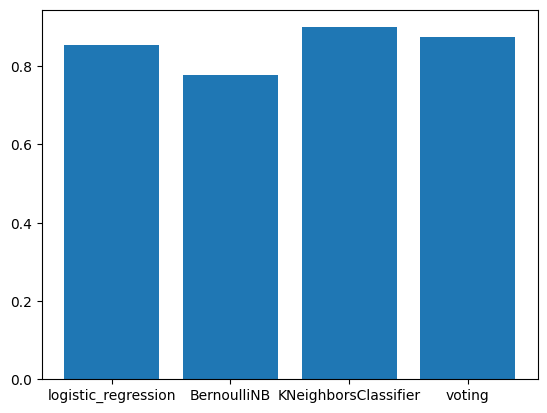

In [37]:
from matplotlib import pyplot as plt
l_classifiers=['logistic_regression', 'BernoulliNB', 'KNeighborsClassifier', 'voting']
plt.bar(l_classifiers,l_accuracy)

In [38]:
#--Apply KNeighborsClassifier

In [39]:
#TRAINING DATA
#input training data for 'Death Rate(in %)
train_X=train[prediction_var]
#output training data
train_Y=train['Death Rate(in %)']

In [40]:
#TESTING DATA
#same steps for testing data
#input testing data for Total Towers(Present)
test_X=test[prediction_var]
#output testing data
test_Y=test['Death Rate(in %)']

In [41]:
#Training the model Status

knn_classifier=KNeighborsClassifier(n_neighbors=8)
knn_classifier.fit(train_X,train_Y)

KNeighborsClassifier(n_neighbors=8)

In [42]:
#Testing the algorithm Status
predicted_value=knn_classifier.predict(test_X)

In [43]:
#prediction using 'Death Rate(in %)

pd.DataFrame({'predicted_value of Death Rate(in %)':predicted_value,'Known O/P Death Rate(in %)':test_Y})

,predicted_value of Death Rate(in %),Known O/P Death Rate(in %)
1618,29,63
868,22,68
177,25,58
229,27,25
1729,20,80
...,...,...
534,22,29
1685,25,29
716,22,53
451,44,51
